# Neusmerjeni dvociklični grafi nižjih redov

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, product
import numpy as np

In [18]:
# Preverimo ali je nek graf Laplacov integer graf
def is_laplacian_integer_graph(G):
    laplace = nx.laplacian_matrix(G).toarray()  # Laplacova matrika v torray formatu (za lažje računanje)
    eigenvalues = np.linalg.eigvals(laplace) # Lastne vrednosti
    return all(np.isclose(lv, np.round(lv)) for lv in eigenvalues)  # Aproksimacija zaradi numeričnege računanja lastnih vrednosti

In [ ]:
def generate_graphs_with_two_cycles(n):
    graphs = []

    if n < 6:  
        return graphs

    # Dolžine ciklov
    for k1 in range(3, n - 2):  
        for k2 in range(3, n - k1 + 1):
            # Vozlišča ciklov
            cycle1_nodes = list(range(k1))
            cycle2_nodes = list(range(k1 , k1 + k2))
            cycle1_nodes_zlepek = list(range(k1))
            cycle2_nodes_zlepek = list(range(k1 - 1, k1 + k2 - 1))

            # Povezave za cikla
            graph = nx.Graph()
            graph_zlepek = nx.Graph()
            
            graph.add_edges_from([(cycle1_nodes[i], cycle1_nodes[(i + 1) % k1]) for i in range(k1)]) 
            graph.add_edges_from([(cycle2_nodes[i], cycle2_nodes[(i + 1) % k2]) for i in range(k2)]) 
            graph_zlepek.add_edges_from([(cycle1_nodes_zlepek[i], cycle1_nodes_zlepek[(i + 1) % k1]) for i in range(k1)]) 
            graph_zlepek.add_edges_from([(cycle2_nodes_zlepek[i], cycle2_nodes_zlepek[(i + 1) % k2]) for i in range(k2)])

            remaining_nodes = list(range(k1 + k2 , n)) # Preostala vozlišča
            remaining_nodes_zlepek = list(range(k1 + k2 - 1 , n))

            # Ustvarjanje povezav med cikloma
            for num_edges in range(len(remaining_nodes) + 1): 
                for edges in combinations(remaining_nodes, num_edges):
                    new_graph = graph.copy()

                    # Dodajanje povezav med cikloma
                    if edges:  # Če imamo izbrane povezave
                        if len(edges) == 1:
                            new_graph.add_edge(cycle1_nodes[0], edges[0])  
                            new_graph.add_edge(cycle2_nodes[0], edges[0])
                        else: 
                            prev_edge = 0
                            for edge in edges:
                                if edge == edges[0]:
                                    prev_edge = edge
                                    continue
                                new_graph.add_edge(edge, prev_edge)
                                prev_edge = edge
                            new_graph.add_edge(cycle1_nodes[0], edges[0])  
                            new_graph.add_edge(cycle2_nodes[0], prev_edge)    
                                 
                    else:
                        # Brez povezav, samo stik med cikloma
                        new_graph.add_edge(cycle1_nodes[0], cycle2_nodes[0])

                    # Dodajanje drevesnih povezav na cikla
                    for i in range(len(remaining_nodes) + 1):
                        for tree_edges in combinations(product(range(k1 + k2 + num_edges + i), remaining_nodes), len(remaining_nodes)):
                            tree_graph = nx.Graph()
                            tree_graph.add_edges_from(tree_edges)

                            full_graph = new_graph.copy()
                            full_graph.add_edges_from(tree_graph.edges)

                            # Pogoji
                            if nx.is_connected(full_graph) and len(list(nx.cycle_basis(full_graph))) == 2 and full_graph.number_of_nodes() == n:
                                if not any(nx.is_isomorphic(full_graph, g) for g in graphs):
                                    graphs.append(full_graph)

            for i in range(len(remaining_nodes_zlepek) + 1):
                        for tree_edges in combinations(product(range(k1 + k2 + i - 1), remaining_nodes_zlepek), len(remaining_nodes_zlepek)):
                            tree_graph = nx.Graph()
                            tree_graph.add_edges_from(tree_edges)

                            full_graph = new_graph.copy()
                            full_graph.add_edges_from(tree_graph.edges)


                            # Pogoji
                            if nx.is_connected(full_graph) and len(list(nx.cycle_basis(full_graph))) == 2 and full_graph.number_of_nodes() == n:
                                if not any(nx.is_isomorphic(full_graph, g) for g in graphs):
                                    graphs.append(full_graph)                    
            


    return graphs

### Primer za n=8

Število generiranih povezanih grafov z dvema cikloma za n = 8: 1


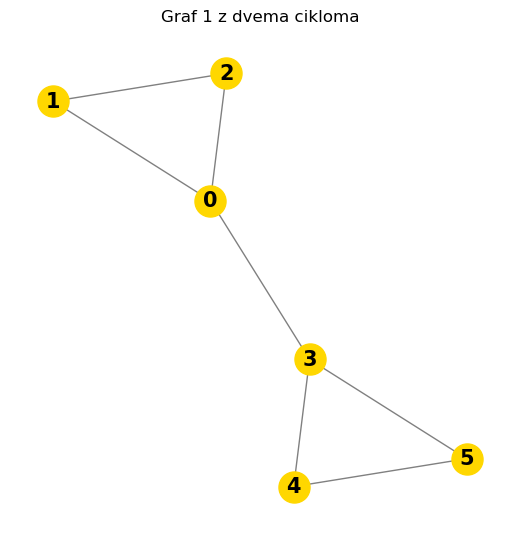

In [44]:
generate_graphs_with_two_cycles = generate_graphs_with_two_cycles(6)

print(f"Število generiranih povezanih grafov z dvema cikloma za n = 8: {len(generate_graphs_with_two_cycles)}")

for i, graph in enumerate(generate_graphs_with_two_cycles):
    plt.figure(figsize = (5, 5))
    nx.draw(graph, with_labels = True, node_color = 'gold' , node_size = 500, font_size = 15, font_color = 'black', font_weight = 'bold', edge_color = 'gray')
    plt.title(f'Graf {i + 1} z dvema cikloma')
    plt.show()

In [6]:
def bicycle_laplacian_integer_graph(n):
    graphs_with_two_cycles = generate_graphs_with_two_cycles(n)
    laplacian_graphs = [graph for graph in graphs_with_two_cycles if is_laplacian_integer_graph(graph)]

    print(f"Total graphs with two connected cycles: {len(graphs_with_two_cycles)}")
    print(f"Total Laplacian integer graphs found: {len(laplacian_graphs)}")

    for i, graph in enumerate(laplacian_graphs):
        print(f"Laplacian Graph {i + 1}:")
        print("Edges:", list(graph.edges()))
        plt.figure()
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, node_color='gold', node_size=750, edge_color='gray')
        plt.title(f"Laplacian Graph {i + 1}")
        plt.show()

In [7]:
bicycle_laplacian_integer_graph(8)

Total graphs with two connected cycles: 20
Total Laplacian integer graphs found: 0
